In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
import math
import random
import pickle
import itertools

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, label_ranking_average_precision_score, label_ranking_loss, coverage_error 

from sklearn.utils import shuffle

from scipy.signal import resample

import matplotlib.pyplot as plt

np.random.seed(42)

import pickle
from sklearn.preprocessing import OneHotEncoder




from keras.models import Model
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, Softmax, Add, Flatten, Activation# , Dropout
from keras import backend as K
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, ModelCheckpoint




import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import math
import random
import pickle
import itertools
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
np.random.seed(42)
import tensorflow as tf
import tensorflow.keras as keras

In [3]:
print(os.getcwd())

C:\Users\jvcor\Documents\Jupyter files\BIOINF ECG


In [4]:
ptbdb_1_data = pd.read_csv("ptbdb_abnormal.csv", header=None)

ptbdb_1_data.tail()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
10501,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10502,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10503,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10504,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10505,0.997886,0.700317,0.464059,0.318182,0.233615,0.184989,0.124207,0.082981,0.087738,0.063953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
ptbdb_0_data = pd.read_csv("ptbdb_normal.csv", header=None)

ptbdb_0_data.tail()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
4041,1.000000,0.929586,0.503550,0.293491,0.169822,0.159763,0.130769,0.125444,0.137278,0.111243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4042,1.000000,0.637579,0.154837,0.061983,0.088965,0.083374,0.065143,0.057365,0.060039,0.060039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4043,1.000000,0.872574,0.465071,0.232212,0.126132,0.155886,0.174644,0.190168,0.203752,0.168823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4044,0.915983,0.529373,0.288406,0.144536,0.171802,0.180669,0.177566,0.176458,0.178896,0.180448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4045,1.000000,0.838643,0.390567,0.191146,0.033513,0.055854,0.129086,0.147290,0.155151,0.165494,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#all_data = [ptbdb_1_data, ptbdb_0_data]

#ptbdb_data = pd.concat(all_data)

#print(ptbdb_data.head())
#print(ptbdb_data.tail())

In [7]:
# There is a huge difference in the balanced of the classes.
# Better choose the resample technique more than the class weights for the algorithms.
from sklearn.utils import resample

df_1_upsample=resample(ptbdb_1_data,replace=True,n_samples=20000,random_state=123)
df_0_upsample=resample(ptbdb_0_data,replace=True,n_samples=20000,random_state=124)

upsample_df=pd.concat([df_1_upsample,df_0_upsample])

equilibre=upsample_df[187].value_counts()
print(equilibre)

1.0    20000
0.0    20000
Name: 187, dtype: int64


In [8]:
print("ALL Train data")
print("Type\tCount")
print((ptbdb_1_data[187]).value_counts())
print((ptbdb_0_data[187]).value_counts())
print("-------------------------")

print("ALL Balanced Train data")
print("Type\tCount")
print((upsample_df[187]).value_counts())
print("-------------------------")

ALL Train data
Type	Count
1.0    10506
Name: 187, dtype: int64
0.0    4046
Name: 187, dtype: int64
-------------------------
ALL Balanced Train data
Type	Count
1.0    20000
0.0    20000
Name: 187, dtype: int64
-------------------------


In [9]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(upsample_df, test_size=0.3)

In [10]:
#test = pd.read_csv("mitbih_test.csv", header=None)
#test = test.iloc[0,0:len(test.T)-1] # Remove last line cause it might be a Nan
#test = pd.DataFrame(test)
# NORMALIZING TEST DATA AMPLITUDE
from sklearn.preprocessing import MinMaxScaler
# load the dataset and print the first 5 rows
# prepare data for normalization
values = test_df.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
normalized = scaler.transform(values)
normalized = pd.DataFrame(normalized)
normalized

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.958805,0.635338,0.142636,0.051084,0.078947,0.084697,0.066275,0.059652,0.057890,0.058957,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,1.000000,0.908000,0.543429,0.274286,0.301143,0.239429,0.169519,0.196180,0.201367,0.167236,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
2,0.639478,1.000000,0.573005,0.100351,0.013547,0.000000,0.062995,0.140475,0.157618,0.159920,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,1.000000,0.849539,0.363357,0.051177,0.000000,0.246673,0.362712,0.390093,0.405001,0.366233,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
4,0.918523,0.509702,0.169038,0.062527,0.081069,0.076757,0.058505,0.051551,0.045153,0.047974,...,0.059899,0.061305,0.062242,0.080316,0.093832,0.094284,0.168308,0.177448,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,1.000000,0.570932,0.166763,0.000000,0.277939,0.474233,0.585095,0.572122,0.590575,0.606468,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
11996,1.000000,0.884292,0.565919,0.433380,0.443198,0.265778,0.289687,0.240754,0.245001,0.248810,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
11997,0.854383,0.744478,0.218373,0.032631,0.000000,0.047189,0.070142,0.067708,0.060147,0.067925,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
11998,0.734317,0.638298,0.606383,0.671031,0.676759,0.683306,0.681066,0.719923,0.689623,0.695518,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0


In [12]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import Embedding
from keras.preprocessing import sequence

np.random.seed(7)

In [18]:
from keras.utils import to_categorical

print("--- X ---")
# X = mit_train_data.loc[:, mit_train_data.columns != 187]
X = train_df.loc[:, train_df.columns != 187]
print(X.head())
print(X.info())

print("--- Y ---")
# y = mit_train_data.loc[:, mit_train_data.columns == 187]
y = train_df.loc[:, train_df.columns == 187]
y = to_categorical(y)

print("--- testX ---")
#testX = mit_test_data.loc[:, mit_test_data.columns != 187]
testX = test_df.loc[:, test_df.columns != 187]
print(testX.head())
print(testX.info())

print("--- testy ---")
#testy = mit_test_data.loc[:, mit_test_data.columns == 187]
testy = test_df.loc[:, test_df.columns == 187]
testy = to_categorical(testy)

--- X ---
           0         1         2         3         4         5         6    \
3594  0.923511  0.743038  0.336271  0.108565  0.000000  0.060627  0.103631   
5635  0.910864  1.000000  0.766017  0.590529  0.059889  0.169916  0.110028   
2462  1.000000  0.847532  0.484461  0.240219  0.040951  0.042413  0.092505   
4159  1.000000  0.839048  0.468160  0.198041  0.064381  0.000000  0.065080   
6757  1.000000  0.641906  0.241735  0.002576  0.048089  0.047660  0.018463   

           7         8         9    ...  177  178  179  180  181  182  183  \
3594  0.099753  0.097638  0.097286  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5635  0.044568  0.107242  0.133705  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2462  0.114442  0.111883  0.117367  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4159  0.260322  0.365990  0.409377  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
6757  0.022757  0.014599  0.023615  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

      184  185  186  
3594  0.0  0.0  0.0  
5635  0.

In [19]:
def identity_block(X, f, filters, stage, block):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X
   
    X = Conv1D(filters=F1, kernel_size=1, strides=1, padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv1D(filters=F2, kernel_size=f, strides=1, padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv1D(filters=F3, kernel_size=1, strides=1, padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

In [20]:
def convolutional_block(X, f, filters, stage, block, s=2):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv1D(filters=F1, kernel_size=1, strides=s, padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv1D(filters=F2, kernel_size=f, strides=1, padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv1D(filters=F3, kernel_size=1, strides=1, padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2, name=bn_name_base + '2c')(X)

    X_shortcut = Conv1D(filters=F3, kernel_size=1, strides=s, padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=2, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X
    X_input = Input(input_shape)

    X = ZeroPadding1D(3)(X_input)

    X = Conv1D(64, 7, strides=2, name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling1D(3, strides= 2)(X)

    X = convolutional_block(X, f=3, filters=[128, 128, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [128, 128, 256], stage=2, block='b')
    X = identity_block(X, 3, [128, 128, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = AveragePooling1D(pool_size= 2, padding='same')(X)
    
    model = Model(inputs=X_input, outputs=X, name='ResNet')
    
    
    
    model.add(Conv1D(32,7, padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    model.add(MaxPool1D(5,padding='same'))

    model.add(Conv1D(64,7, padding='same'))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    model.add(MaxPool1D(5,padding='same'))

    model.add(Conv1D(128,7, padding='same'))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    model.add(MaxPool1D(5,padding='same'))

    model.add(Conv1D(256,7, padding='same'))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    model.add(MaxPool1D(5,padding='same'))
    
    model.add(Conv1D(512,7, padding='same'))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    model.add(MaxPool1D(5,padding='same'))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(5, activation="softmax"))
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=[tfa.metrics.F1Score(5,"micro")])
    
    return model

In [23]:
# create the model.
from keras.callbacks import History 
history = History()
embedding_vecor_length = 187

model = Sequential()

model.add(Dense(50, activation='relu', input_shape=(187,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history=model.fit(X, y, epochs=20)

print("Evaluation: ")
mse, acc = model.evaluate(testX, testy)
print('mean_squared_error :', mse)
print('accuracy:', acc)



#model = Sequential()
#model = Bidirectional(model)

#model.add(Embedding(1000, embedding_vecor_length, input_length=187))
#model.add(LSTM(187))
#model.add(Dense(5, activation='softmax'))
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#print(model.summary())
#history = model.fit(X, y, validation_data=(testX, testy), epochs=3, batch_size=8)


#Dropout is a powerful technique for combating overfitting in your LSTM models 
#model = Sequential()
#model.add(Embedding(1000, embedding_vecor_length, input_length=187))
#model.add(LSTM(50, dropout=0.001, recurrent_dropout=0.001))
#model.add(Dense(5, activation='softmax'))
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#print(model.summary())
#history = model.fit(X, y, validation_data=(testX, testy), epochs=50, batch_size=128)



## SAVE MODEL ##
# serialize model to JSON
#model_json = model.to_json()
#with open("1model.json", "w") as json_file:
 #   json_file.write(model_json)
# serialize weights to HDF5
#model.save_weights("1model.h5")
#print("Saved model to disk")

Epoch 1/20
875/875 [==============================] - 5s 2ms/step - loss: 0.4248 - accuracy: 0.8097
Epoch 2/20
875/875 [==============================] - 2s 2ms/step - loss: 0.2873 - accuracy: 0.8837
Epoch 3/20
875/875 [==============================] - 2s 2ms/step - loss: 0.2186 - accuracy: 0.9159
Epoch 4/20
875/875 [==============================] - 2s 2ms/step - loss: 0.1762 - accuracy: 0.9348
Epoch 5/20
875/875 [==============================] - 2s 2ms/step - loss: 0.1456 - accuracy: 0.9455
Epoch 6/20
875/875 [==============================] - 2s 2ms/step - loss: 0.1246 - accuracy: 0.9565
Epoch 7/20
875/875 [==============================] - 2s 2ms/step - loss: 0.1122 - accuracy: 0.9598
Epoch 8/20
875/875 [==============================] - 2s 2ms/step - loss: 0.0987 - accuracy: 0.9656
Epoch 9/20
875/875 [==============================] - 2s 2ms/step - loss: 0.0890 - accuracy: 0.9688
Epoch 10/20
875/875 [==============================] - 2s 2ms/step - loss: 0.0776 - accuracy: 0.9739

dict_keys(['loss', 'accuracy'])


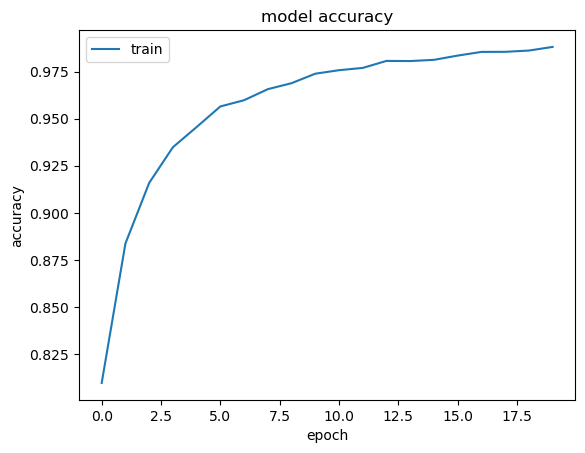

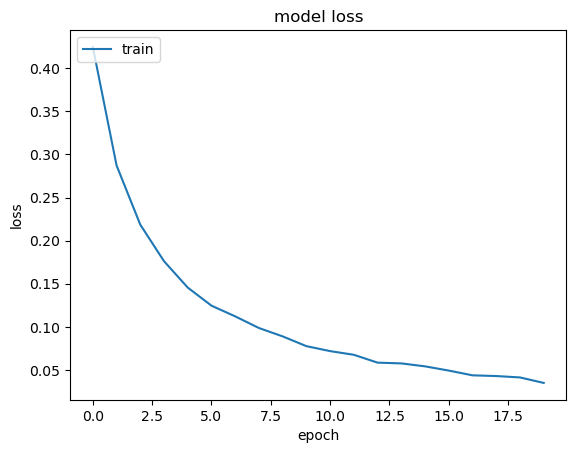

In [24]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
y_pred = model.predict(testX, batch_size=1000)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, label_ranking_average_precision_score, label_ranking_loss, coverage_error 

print(classification_report(testy.argmax(axis=1), y_pred.argmax(axis=1)))

12/12 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      6003
           1       1.00      0.97      0.98      5997

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



In [28]:
test_df.to_csv("new_ptbdb_data.csv")